# Collapse of an homogeneous sphere

Consider 100 particles homogeneously distributed inside a sphere, truncated at a radius $a=10$, with an initial velocity $v=0$.

From a theoretical point of view we expect the sphere to collapse in a single point, with each particle that reach the centre at the same *dynamical time*. But in our numerical simulation we considered a finite number of particles; due to mutual interaction between particle that are closer than the average, there is the possibility that some masses gain energy, enough to escape the bound system.

In addition to the possibility for the particles to escape, there is another difference between the theoretical model and the numerical simulation: the masses reach the centre at slightly different time, this translate into a system that oscillate around the central point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from mpl_toolkits import mplot3d

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,7]

## Initial conditions
Let's set the initial conditions of the simulation, in particular considering the probability distribution functions of the spherical components.

In [2]:
a=10
N=100

u=np.random.uniform(0,1,N)

f = lambda u: (a**3*u)**(1/3)

r=f(u)
np.random.shuffle(r)

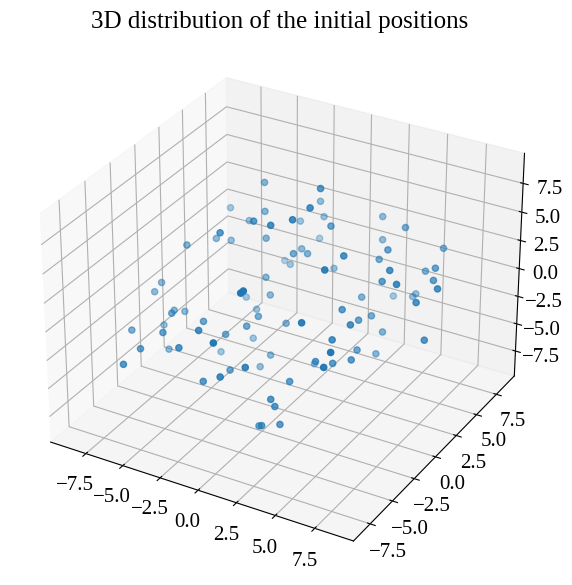

In [3]:
#p(phi)=sin(phi)/2

v = lambda u: np.arccos(2*u-1)

phi=v(u)
np.random.shuffle(phi)

theta=np.random.uniform(0, 2*np.pi, N)
np.random.shuffle(theta)

x=r*np.cos(theta)*np.sin(phi)
y=r*np.sin(theta)*np.sin(phi)
z=r*np.cos(phi)

ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z)
plt.title("3D distribution of the initial positions")
plt.show()

#plt.scatter(x,y)
#plt.title("Distribution on the xy plane")
#plt.xlabel("x")
#plt.ylabel("y")
#plt.show()

In [4]:
m=np.ones(N)
v=np.zeros(N)

data=np.hstack((m.reshape(-1,1), x.reshape(-1,1), y.reshape(-1,1), z.reshape(-1,1), v.reshape(-1,1), v.reshape(-1,1), v.reshape(-1,1)))

#np.savetxt("initial_param.txt", data)

In [5]:
R = np.arange(2, 12, 2)
M_tot = 0
rho = np.zeros(len(R))

for i in range(len(R)):
    for j in range(N):
        if r[j] <= R[i]:
            M_tot += m[j]
    rho[i] = 3 * M_tot / (4 * np.pi * R[i] ** 3)
    M_tot = 0

    
print(R)
print(rho)

[ 2  4  6  8 10]
[0.         0.01865097 0.02652582 0.02517881 0.02387324]


## Results of the simulation

In [6]:
file_name = "par_out_1.txt"

file = open(file_name, 'r')

dim = 3
N_part = int(file.readline()) # read the first line where is written the number of particles
t_0 = file.readline() # read the second line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  100
initial time :  0.01423927931777384

N_lines:  102000


In [7]:
N_lines_snap = 2+N_part
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  1000.0


In [8]:
N_cols = 7
data = np.empty([int(N_snap), int(N_part), int(N_cols)])
times = np.zeros(int(N_snap))
#masses = np.empty([N_snap, N_part])

for i_snap in range(int(N_snap)):
    initial_line = i_snap * N_lines_snap
    data_init_line = initial_line + 2
    
    times[i_snap] = np.genfromtxt(file_name, skip_header=initial_line+1, max_rows=1)
    #masses[i_snap] = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part, usecols=0)
    values = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part)
    data[i_snap] = values

print(data[0][0])

[ 1.00000000e+00 -6.84292078e+00 -7.36630076e-01  3.50005075e+00
  8.36140948e-03  2.26512914e-04 -3.20871858e-03]


In [9]:
masses = np.empty([int(N_snap), int(N_part)])
positions = np.empty([int(N_snap), int(N_part), dim])
velocities = np.empty([int(N_snap), int(N_part), dim])


for i in range(int(N_snap)):
    for j in range(int(N_part)):
        masses[i,j] = data[i,j,0]
        positions[i,j] = data[i,j,1:4]
        velocities[i,j] = data[i,j,4:]
        

        
index=np.array(range(N_part))
index=index[::5]

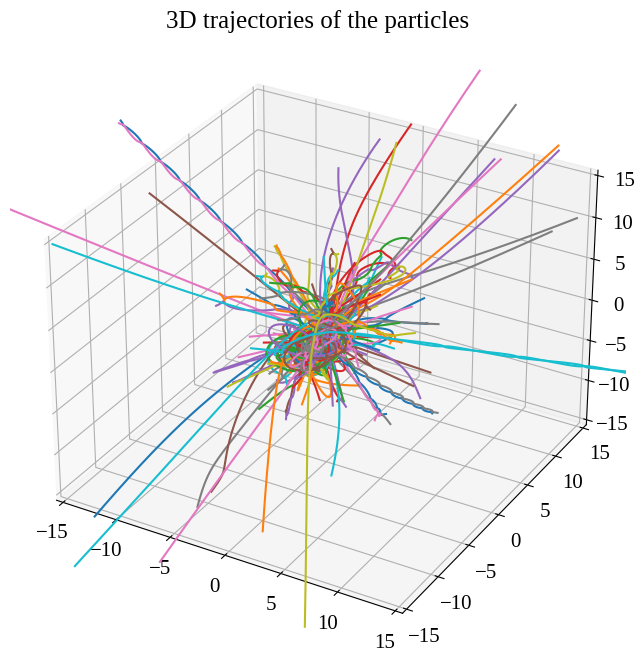

In [10]:
from mpl_toolkits import mplot3d

%matplotlib inline


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in range(N_part):
    ax.plot3D(positions[:,i,0], positions[:,i,1], positions[:,i,2])

ax.axes.set_xlim3d(left=-15, right=15) 
ax.axes.set_ylim3d(bottom=-15, top=15) 
ax.axes.set_zlim3d(bottom=-15, top=15)
plt.title("3D trajectories of the particles")
plt.show()

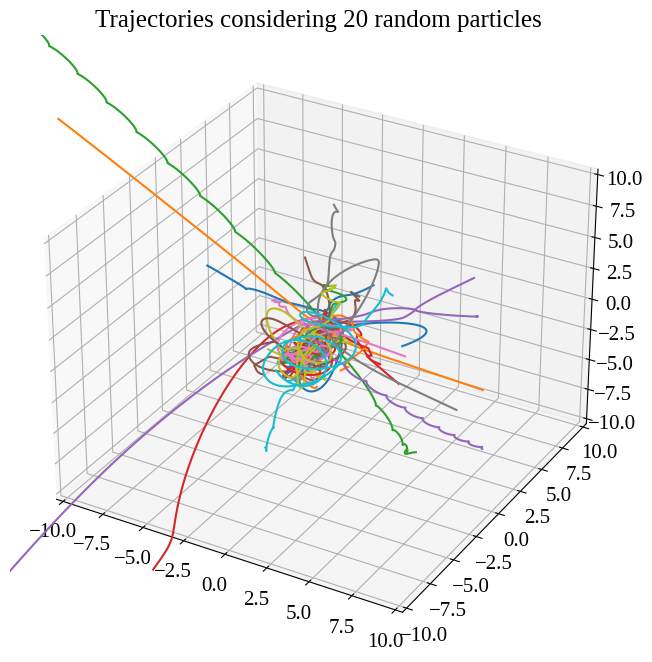

In [11]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in index:
    ax.plot3D(positions[:,i,0], positions[:,i,1], positions[:,i,2])

ax.axes.set_xlim3d(left=-10, right=10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-10, top=10)
plt.title("Trajectories considering %d random particles" %len(index))
plt.show()

In [12]:
x=positions[:,:,0]
y=positions[:,:,1]
z=positions[:,:,2]

In [13]:
# animation

l=10

def update(num):
    ax.clear()
    
    ax.scatter(x[num-1,:], y[num-1,:], z[num-1,:], color='black')

    ax.set_title(f'{N_part} particles, time = {round(times[num],2)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=range(len(times)))

# Saving the Animation
f = r"sphere_1.gif"
writergif = animation.PillowWriter(fps=30)
#line_ani.save(f, writer=writergif)

plt.close()

![SegmentLocal](sphere_1.gif "segment")

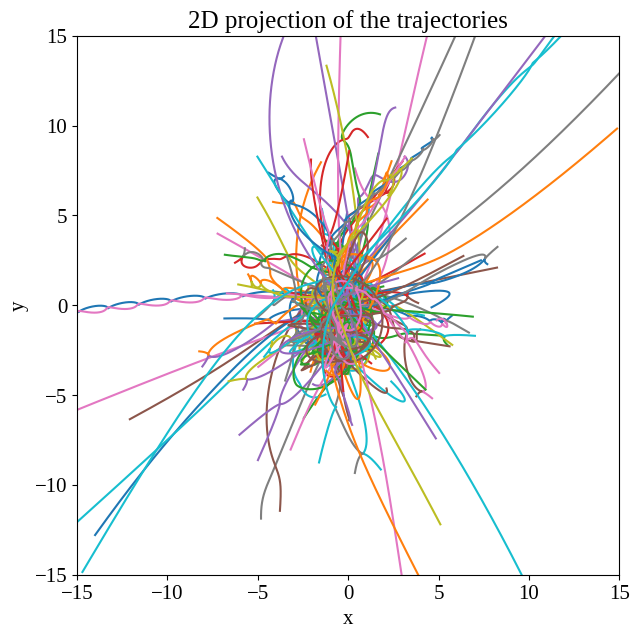

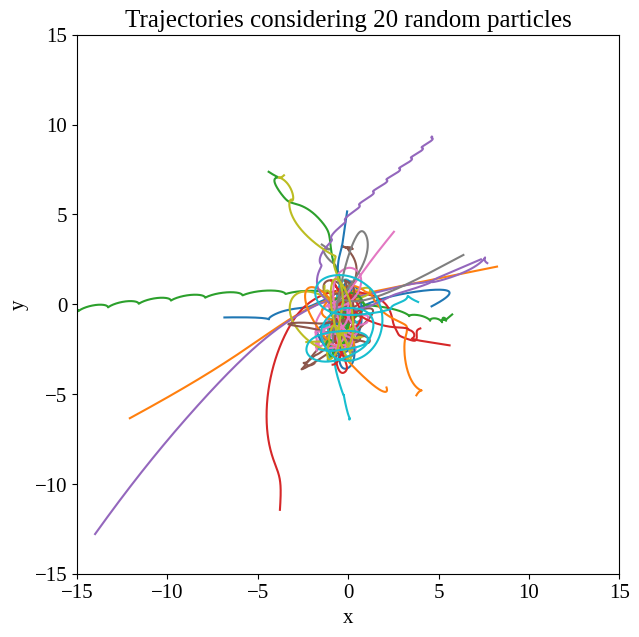

In [14]:
for i in range(N_part):
    plt.plot(positions[:,i,0], positions[:,i,1])
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("2D projection of the trajectories")
plt.show()


for i in index:
    plt.plot(positions[:,i,0], positions[:,i,1])
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("Trajectories considering %d random particles" %len(index))
plt.show()

## Radii of the particles
We considered the evolution of the distances from the centre of the particles, to verify the dynamical timescale of the system and to observe the presence of unbounded particles.

Let's first compute the dynamical time using the formula (G=1): $$T_{dyn}=\sqrt{\frac{3\pi}{16\rho_0}}$$
and the collapse time: $$T_{coll}=\sqrt{\frac{3\pi}{32\rho_0}}=\frac{T_{dyn}}{\sqrt{2}}$$

In [15]:
rho=3*N_part/(4 * np.pi * 10**3)
t_dyn=(3*np.pi/(16*rho))**(1/2)
t_coll=t_dyn/(2)**(1/2)

print("The dynamical timescale is: ", round(t_dyn,3))
print("The collapse timescale is: ", round(t_coll,3))

The dynamical timescale is:  4.967
The collapse timescale is:  3.512


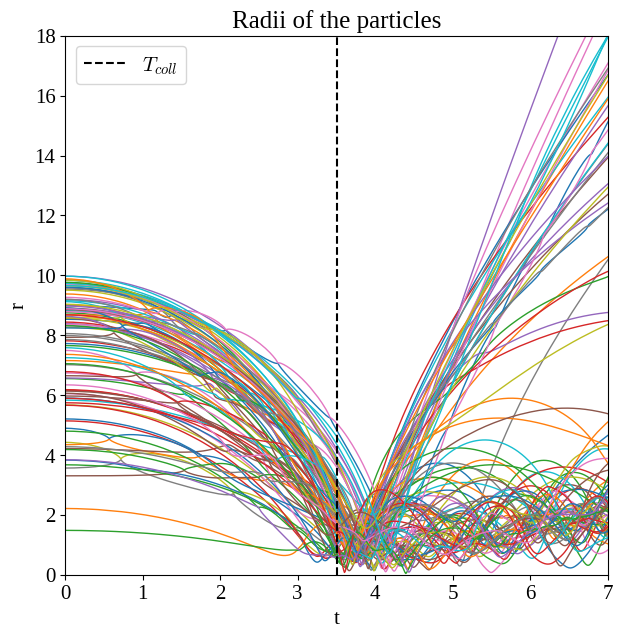

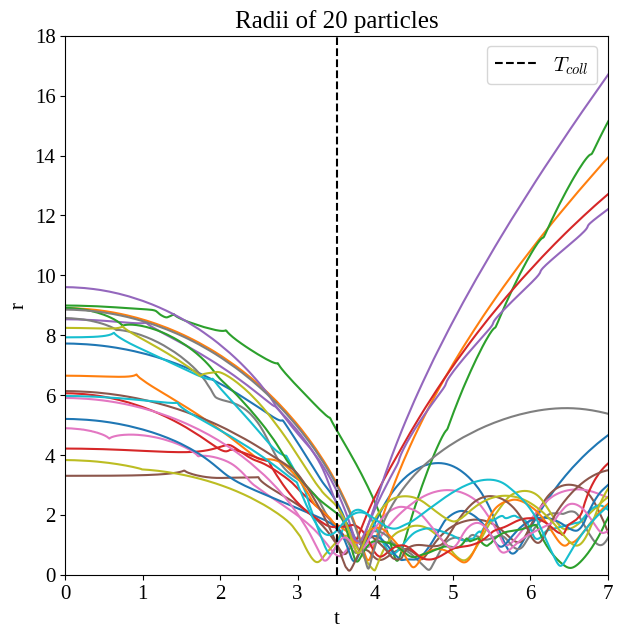

In [16]:
t=np.linspace(0,times[-1],int(N_snap))

for i in range(N_part):
    r=(positions[:,i,0]**2 + positions[:,i,1]**2 + positions[:,i,2]**2)**(1/2)
    plt.plot(t,r, lw=1)

plt.ylabel("r")
plt.xlabel("t")
plt.xlim(0,7)
plt.ylim(0,18)
plt.title("Radii of the particles")
plt.vlines(t_coll, 0, 18, ls='--', color='black', label='$T_{coll}$')
plt.legend()
plt.show()


for i in index:
    r=(positions[:,i,0]**2 + positions[:,i,1]**2 + positions[:,i,2]**2)**(1/2)
    plt.plot(t,r)

plt.ylabel("r")
plt.xlabel("t")
plt.xlim(0,7)
plt.ylim(0,18)
plt.title("Radii of %d particles" %len(index))
plt.vlines(t_coll, 0, 18, ls='--', color='black', label='$T_{coll}$')
plt.legend()
plt.show()

As it is possible to observe, all the particles get closer to the centre of the sphere nearly at the same time, independent on the initial distance.
After the collapse the bounded particles oscillate near the centre, while some particles, that gain enough energy, escape from the system.